<a href="https://colab.research.google.com/github/kovacova/random-magic/blob/master/projects/15-random-forests-decision-trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forests & Decision Trees

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.rcParams['figure.figsize'] = [16, 12]

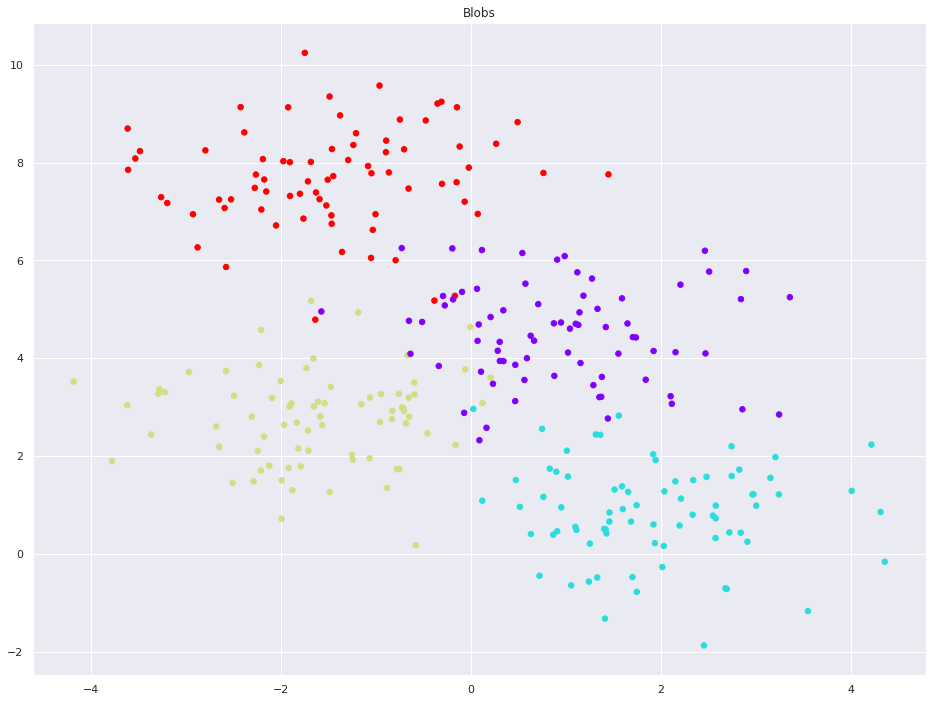

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap='rainbow');
plt.title('Blobs');

## Classifier Visualization

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [0]:
# A utility function to help us visualize the output of the classifier

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
  ax = ax or plt.gca()
  
  # Plot the training points
  ax.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap=cmap, 
             clim=(y.min(), y.max()), zorder=3)
  
  ax.axis('tight')
  ax.axis('off')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  
  # fit the estimator
  model.fit(X, y)
  xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                       np.linspace(*ylim, num=200))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  
  # Create a color plot with the results
  n_classes = len(np.unique(y))
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
                         levels=np.arange(n_classes + 1) - 0.5,
                         cmap=cmap, clim=(y.min(), y.max()),
                         zorder=1)
  
  ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


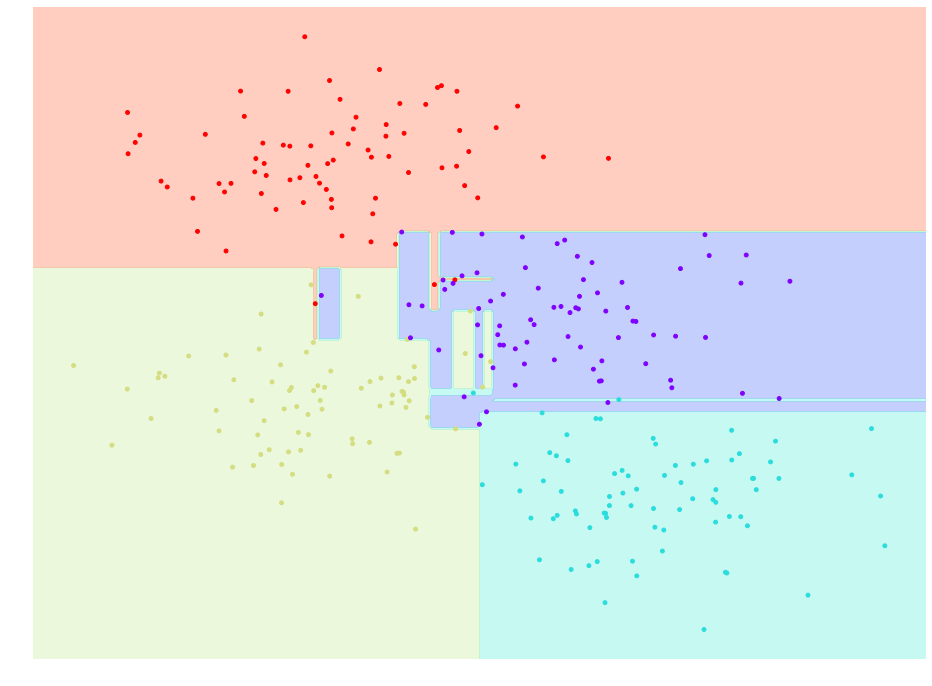

In [39]:
# A Decision Tree visualization

visualize_classifier(DecisionTreeClassifier(), X, y);

## Bagging



/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


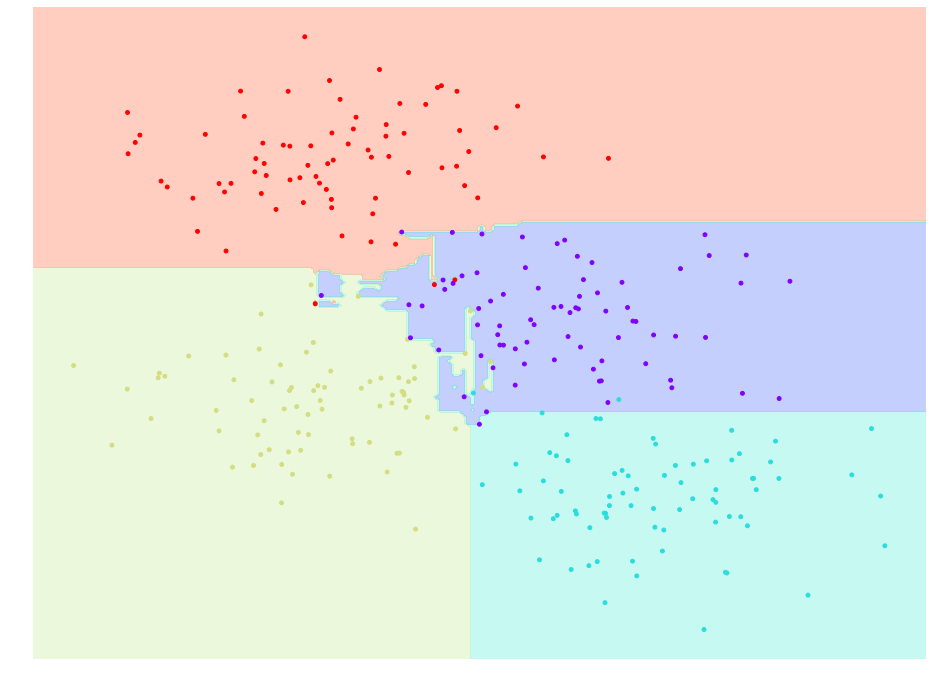

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, 
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

## Random Forests


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


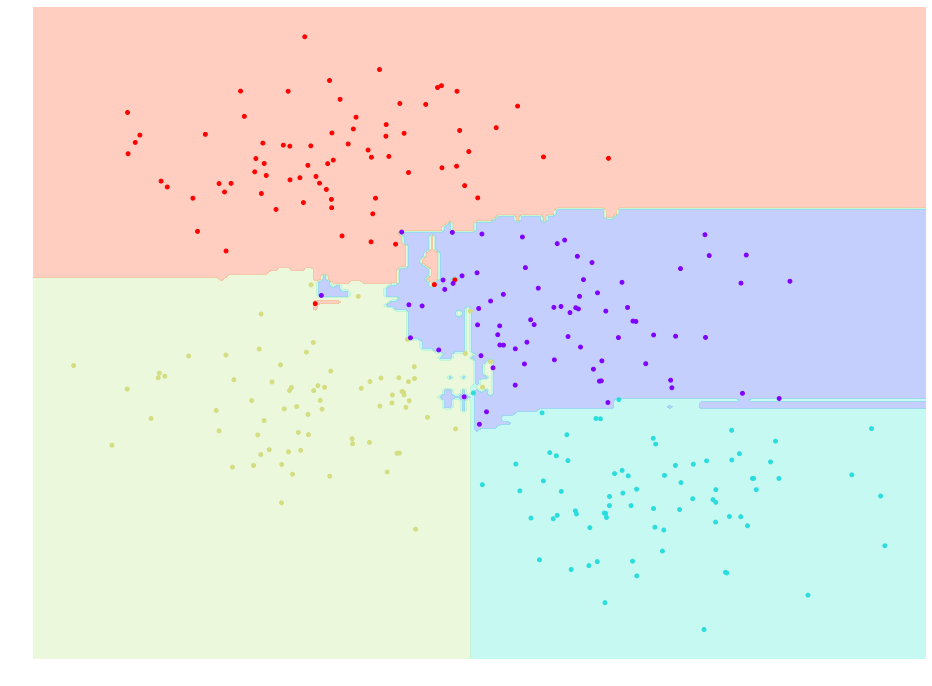

In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

visualize_classifier(model, X, y)